In [1]:
# numpy va pandas kutubxonalari data ni tahrirlash uchun
import numpy as np
import pandas as pd 

# fayl managment uchun
import os

# ortiqcha ogohlantirishlarni ko'rsatmaslik uchun
import warnings
warnings.filterwarnings('ignore')

# grafik chizish uchun
import matplotlib.pyplot as plt
import seaborn as sns

Berilgan ma'lumotlar fayllarini yuklab olamiz

In [2]:
print(os.listdir("./data/"))

['.ipynb_checkpoints', 'application_metadata.csv', 'credit_history.parquet', 'demographics.csv', 'financial_ratios.jsonl', 'geographic_data.xml', 'loan_details.xlsx']


In [136]:
application_metadata = pd.read_csv("./data/application_metadata.csv")
credit_history_data = pd.read_parquet("./data/credit_history.parquet", engine="pyarrow")
demographics_data = pd.read_csv("./data/demographics.csv")
financial_ratios_data = pd.read_json("./data/financial_ratios.jsonl", lines=True)
geographic_data = pd.read_xml("./data/geographic_data.xml")
loan_details_data = pd.read_excel("./data/loan_details.xlsx")

print("application_metadata's shape", application_metadata.shape)
print("credit_history's shape", credit_history_data.shape)
print("demographics's shape", demographics_data.shape)
print("financial_ratios_data's shape", financial_ratios_data.shape)
print("geographic_data's shape", geographic_data.shape)
print("loan_details_data's shape", loan_details_data.shape)

application_metadata's shape (89999, 14)
credit_history's shape (89999, 12)
demographics's shape (89999, 8)
financial_ratios_data's shape (89999, 16)
geographic_data's shape (89999, 8)
loan_details_data's shape (89999, 10)


Ma'lumot haqida informatsiyalarni ko'ramiz

In [4]:
print("application_metadata")
application_metadata.info()
print("credit_history_data")
credit_history_data.info()
print("demographics_data")
demographics_data.info()
print("financial_ratios_data")
financial_ratios_data.info()
print("geographic_data")
geographic_data.info()
print("loan_details_data")
loan_details_data.info()
loan_details_data.info()

application_metadata
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_ref                89999 non-null  int64  
 1   application_id              89999 non-null  int64  
 2   application_hour            89999 non-null  int64  
 3   application_day_of_week     89999 non-null  int64  
 4   account_open_year           89999 non-null  int64  
 5   preferred_contact           89999 non-null  object 
 6   referral_code               89999 non-null  object 
 7   account_status_code         89999 non-null  object 
 8   random_noise_1              89999 non-null  float64
 9   num_login_sessions          89999 non-null  int64  
 10  num_customer_service_calls  89999 non-null  int64  
 11  has_mobile_app              89999 non-null  int64  
 12  paperless_billing           89999 non-null  int64  
 13  default   

In [5]:
def clear_currency(x):
    if pd.isna(x):
        return None
    return (
        str(x)
        .replace('$', '')
        .replace(',', '')
        .strip()
    )

def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

currency normalization qilish uchun va missing value larni qanchaligini ko'rish uchun kerakli function larni yozib olamiz

In [137]:
demographics_data['annual_income'] = demographics_data['annual_income'].apply(clear_currency).astype(float)
financial_ratios_data['monthly_income'] = financial_ratios_data['monthly_income'].apply(clear_currency).astype(float)
financial_ratios_data['existing_monthly_debt'] = financial_ratios_data['existing_monthly_debt'].apply(clear_currency).astype(float)
financial_ratios_data['monthly_payment'] = financial_ratios_data['monthly_payment'].apply(clear_currency).astype(float)
financial_ratios_data['revolving_balance'] = financial_ratios_data['revolving_balance'].apply(clear_currency).astype(float)
financial_ratios_data['credit_usage_amount'] = financial_ratios_data['credit_usage_amount'].apply(clear_currency).astype(float)
financial_ratios_data['available_credit'] = financial_ratios_data['available_credit'].apply(clear_currency).astype(float)
financial_ratios_data['total_monthly_debt_payment'] = financial_ratios_data['total_monthly_debt_payment'].apply(clear_currency).astype(float)
financial_ratios_data['total_debt_amount'] = financial_ratios_data['total_debt_amount'].apply(clear_currency).astype(float)
financial_ratios_data['monthly_free_cash_flow'] = financial_ratios_data['monthly_free_cash_flow'].apply(clear_currency).astype(float)
loan_details_data['loan_amount'] = loan_details_data['loan_amount'].apply(clear_currency).astype(float)

funksiya yordamida datalar normallashtirish qilindi

In [138]:
application_metadata.rename(columns={"customer_ref": "customer_id"}, inplace=True)
credit_history_data.rename(columns={"customer_number": "customer_id"}, inplace=True)
demographics_data.rename(columns={"cust_id": "customer_id"}, inplace=True)
financial_ratios_data.rename(columns={"cust_num": "customer_id"}, inplace=True)
geographic_data.rename(columns={"id": "customer_id"}, inplace=True)

In [139]:
all_data = (
    application_metadata.merge(credit_history_data, on="customer_id")
    .merge(demographics_data, on="customer_id")
    .merge(financial_ratios_data, on="customer_id")
    .merge(geographic_data, on="customer_id")
    .merge(loan_details_data, on="customer_id")
)

barcha table lardagi customer id lar bir xil nomga almashtirildi va barcha ma'lumotlar bitta dataframe ga yig'ildi

In [9]:
all_data.shape

(89999, 63)

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 89999 non-null  int64  
 1   application_id              89999 non-null  int64  
 2   application_hour            89999 non-null  int64  
 3   application_day_of_week     89999 non-null  int64  
 4   account_open_year           89999 non-null  int64  
 5   preferred_contact           89999 non-null  object 
 6   referral_code               89999 non-null  object 
 7   account_status_code         89999 non-null  object 
 8   random_noise_1              89999 non-null  float64
 9   num_login_sessions          89999 non-null  int64  
 10  num_customer_service_calls  89999 non-null  int64  
 11  has_mobile_app              89999 non-null  int64  
 12  paperless_billing           89999 non-null  int64  
 13  default                     899

In [11]:
all_data.drop(columns=['referral_code', 'has_mobile_app', 'paperless_billing', 'previous_zip_code', 'num_customer_service_calls', 'account_open_year','num_login_sessions', 'preferred_contact', 'account_status_code', 'origination_channel', 'marketing_campaign', 'application_id', 'application_hour', 'loan_officer_id', 'application_day_of_week'], inplace=True)

referral_code, marketing_campaign kabi columnlar model uchun deyarli ahamiyati yoqligi uchun olib tashladik

In [12]:
missing_values = missing_values_table(all_data)
missing_values.head(20)

Your selected dataframe has 48 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
employment_length,2253,2.5
revolving_balance,1377,1.5
num_delinquencies_2yrs,832,0.9


missing valuelarni topamiz

In [13]:
all_data['default'].value_counts()

default
0    85405
1     4594
Name: count, dtype: int64

Bu imbalance class muammosiga sabab boladi, chunki positive va negative malumotlar teng emas

In [140]:
all_data.dtypes.value_counts()

float64    30
int64      22
object     11
Name: count, dtype: int64

In [141]:
all_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

preferred_contact         3
referral_code          7805
account_status_code       5
employment_type          16
education                 5
marital_status            3
state                    20
loan_type                12
loan_purpose              8
origination_channel       4
marketing_campaign       26
dtype: int64

In [16]:
print(all_data['employment_type'].unique())
print(all_data['state'].unique())
print(all_data['loan_type'].unique())
print(all_data['loan_purpose'].unique())

['Full-time' 'FULL_TIME' 'Full Time' 'Fulltime' 'Part Time'
 'Self Employed' 'FT' 'Self Emp' 'Contractor' 'Self-employed'
 'SELF_EMPLOYED' 'Contract' 'PART_TIME' 'CONTRACT' 'PT' 'Part-time']
['OH' 'PA' 'VA' 'CA' 'WA' 'MI' 'TX' 'MD' 'NY' 'MO' 'IL' 'FL' 'NJ' 'WI'
 'NC' 'AZ' 'TN' 'IN' 'GA' 'MA']
['Personal' 'mortgage' 'Personal Loan' 'PERSONAL' 'CreditCard'
 'Credit Card' 'Mortgage' 'Home Loan' 'MORTGAGE' 'CC' 'credit card'
 'personal']
['Debt Consolidation' 'Refinance' 'Major Purchase' 'Medical'
 'Revolving Credit' 'Home Improvement' 'Home Purchase' 'Other']


In [17]:
all_data['employment_type'].replace(['Full-time', 'FULL_TIME', 'Fulltime', 'Full Time', 'FT'], 'full_time', inplace=True)
all_data['employment_type'].replace(['Part Time', 'PART_TIME', 'PT', 'Part-time'], 'part_time', inplace=True)
all_data['employment_type'].replace(['Self Employed', 'Self Emp', 'Self-employed', 'SELF_EMPLOYED'], 'self_employed', inplace=True)
all_data['employment_type'].replace(['Contractor', 'Contract', 'CONTRACT'], 'contract', inplace=True)
all_data['loan_type'].replace(['Personal', 'Personal Loan', 'PERSONAL', 'personal'], 'personal', inplace=True)
all_data['loan_type'].replace(['mortgage', 'Mortgage', 'MORTGAGE'], 'mortgage', inplace=True)
all_data['loan_type'].replace(['CreditCard', 'Credit Card', 'CC', 'credit card'], 'credit_card', inplace=True)
all_data['loan_type'].replace(['Home Loan'], 'home_loan', inplace=True)

kategorik malumotlarni encoding uchun bir xil korinishga olib keldik

In [18]:
all_data.shape

(89999, 48)

tozalangan malumotni saqlab olamiz

In [19]:
all_data.to_csv('data.csv', index=False)

In [20]:
all_data.describe()

,customer_id,random_noise_1,default,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,...,monthly_free_cash_flow,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,loan_amount,loan_term,interest_rate,loan_to_value_ratio
count,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89167.000000,89999.000000,...,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000
mean,54999.000000,0.000091,0.051045,716.281681,9.400016,9.344400,112.132806,91483.424260,0.019323,1.495183,...,2143.700718,4.682715,64892.532139,1555.238169,119.074945,97.393438,105977.991978,132.369204,11.278835,0.273598
std,25980.617776,0.997134,0.220091,46.076985,4.769961,5.111351,61.336214,67988.308788,0.138795,1.225129,...,2025.965697,0.596294,9599.130086,267.739999,23.488459,17.994275,147111.296259,152.657187,4.607331,0.378284
min,10000.000000,-4.091319,0.000000,534.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,...,-6050.800000,2.800000,53000.000000,980.000000,71.000000,53.000000,500.000000,0.000000,2.500000,0.000000
25%,32499.500000,-0.671945,0.000000,685.000000,6.000000,5.400000,64.800000,45100.000000,0.000000,1.000000,...,944.000000,4.200000,56000.000000,1340.000000,100.000000,83.000000,9800.000000,12.000000,6.960000,0.000000
50%,54999.000000,0.003168,0.000000,717.000000,9.000000,9.000000,108.000000,72300.000000,0.000000,1.000000,...,1845.900000,4.600000,61000.000000,1500.000000,111.000000,91.000000,19200.000000,48.000000,11.290000,0.000000
75%,77498.500000,0.668945,0.000000,748.000000,13.000000,12.900000,154.800000,117800.000000,0.000000,2.000000,...,3109.915000,5.100000,75000.000000,1750.000000,138.000000,114.000000,192800.000000,360.000000,14.820000,0.725000
max,99998.000000,5.236351,1.000000,850.000000,31.000000,32.200000,386.400000,500000.000000,2.000000,10.000000,...,29793.930000,6.500000,84000.000000,2890.000000,181.000000,147.000000,841300.000000,360.000000,22.800000,0.970000


defaultga uchun correlations hisoblaymiz

malumotlarni saralab olamiz
test va train uchun 80/20 qilib datani bo'lib olamiz
categorical malumotlarni encode qilamiz

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

if 'default' in all_data:
    X = all_data.drop(columns = ['default'])
else:
    X = all_data.copy()
    
y = all_data['default']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42, stratify=y) # split test and train

X_train = pd.get_dummies(X_train) # one-hot encoding
X_test = pd.get_dummies(X_test) # one-hot encoding

In [22]:
train_data = X_train.assign(default=y_train)
correlations = train_data.corr()['default'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 annual_debt_payment        0.042941
loan_type_mortgage         0.043822
loan_term                  0.050014
loan_to_value_ratio        0.052603
credit_utilization         0.058221
marital_status_Single      0.064480
total_debt_amount          0.068413
education_High School      0.080342
loan_amount                0.088098
monthly_payment            0.123553
loan_to_annual_income      0.167776
payment_to_income_ratio    0.216434
debt_service_ratio         0.216526
debt_to_income_ratio       0.216527
default                    1.000000
Name: default, dtype: float64

Most Negative Correlations:
 credit_score                    -0.192358
monthly_free_cash_flow          -0.176838
age                             -0.140342
annual_income                   -0.139674
monthly_income                  -0.139672
total_credit_limit              -0.113082
available_credit                -0.111224
existing_monthly_debt           -0.092692
oldest_credit_line_age          -0.

In [23]:
ratio_data = train_data[['debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio']]
ratio_data.corr()

,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio
debt_to_income_ratio,1.000000,1.000000,0.963768
debt_service_ratio,1.000000,1.000000,0.963769
payment_to_income_ratio,0.963768,0.963769,1.000000


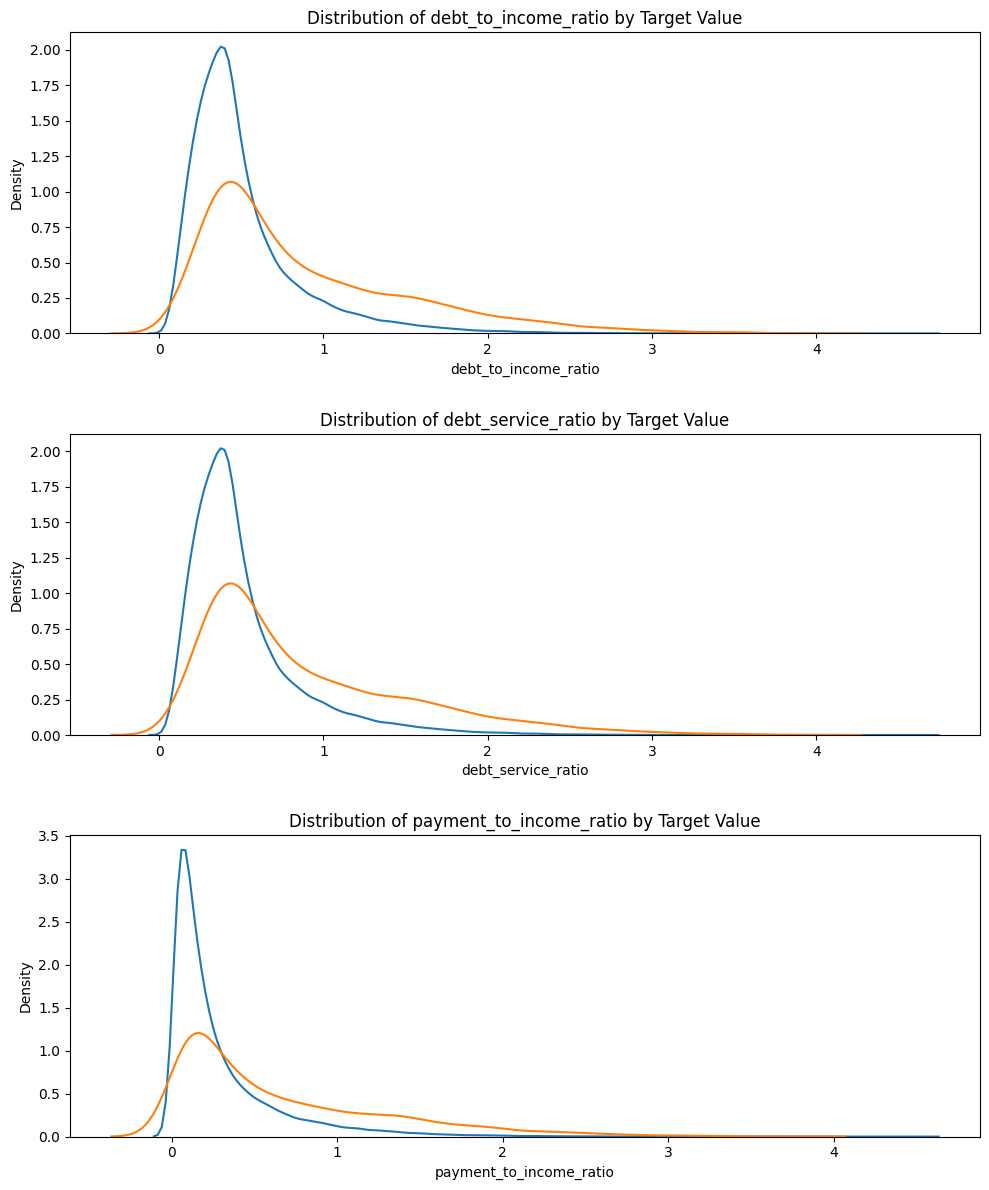

In [24]:
plt.figure(figsize = (10, 12))

for i, ratio in enumerate(['debt_to_income_ratio', 'debt_service_ratio', 'payment_to_income_ratio']):
    
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(train_data.loc[train_data['default'] == 0, ratio], label = 'default == 0')
    sns.kdeplot(train_data.loc[train_data['default'] == 1, ratio], label = 'default == 1')
    
    plt.title('Distribution of %s by Target Value' % ratio)
    plt.xlabel('%s' % ratio); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

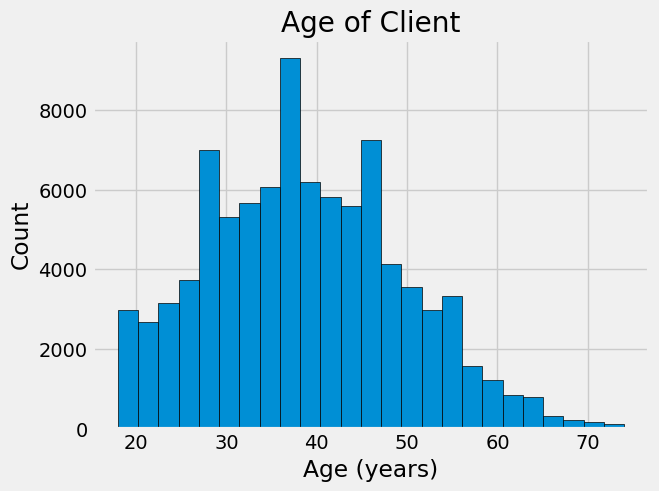

In [25]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(all_data['age'], edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

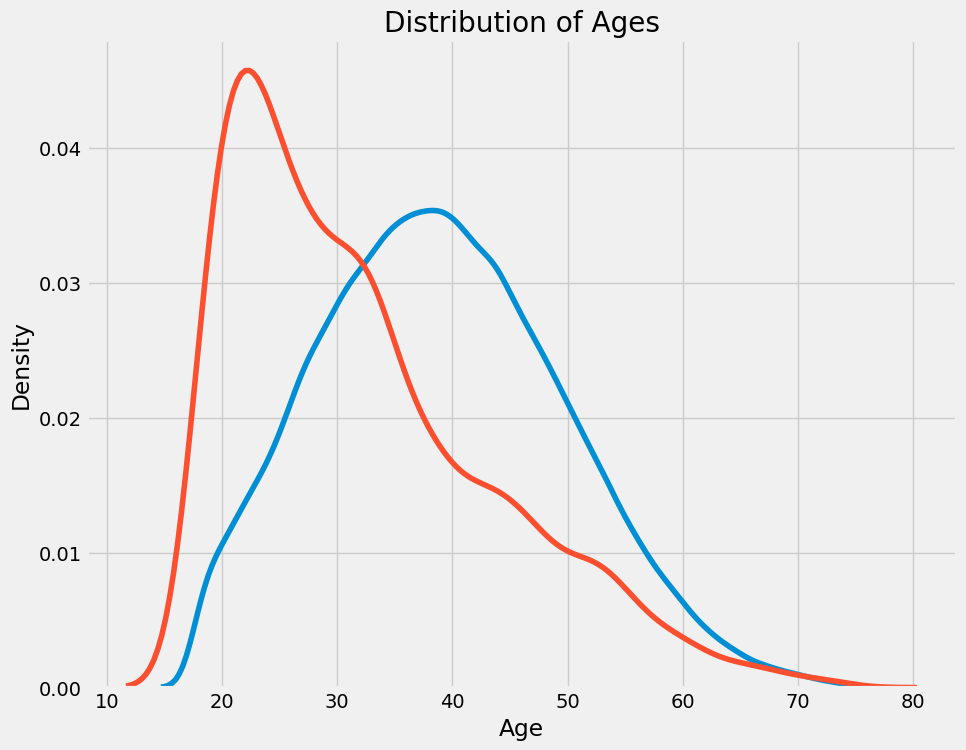

In [26]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(all_data.loc[all_data['default'] == 0, 'age'] , label = 'default == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(all_data.loc[all_data['default'] == 1, 'age'], label = 'default == 1')

# Labeling of plot
plt.xlabel('Age'); plt.ylabel('Density'); plt.title('Distribution of Ages');

numerical malumotlarni scaling qilamiz

In [27]:
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

default imbalanced bolgani uchun sintetik malumot yaratdik

In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ", Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 68324, 1: 3675})
After oversampling:  Counter({0: 68324, 1: 68324})


logistik regression model yaratamiz

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

log_reg = LogisticRegression(
    C=0.001,
    max_iter=2000
)

# Train on the training data
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.001
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


model orqali test datani predict qilamiz

In [30]:
y_pred = log_reg.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, confusion_matrix

print("The accuracy:", accuracy_score(y_test, y_pred))
print("Roc AUC score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion matrix", confusion_matrix(y_test, y_pred))

The accuracy: 0.7387222222222222
Roc AUC score: 0.7238519289675215
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     17081
           1       0.13      0.71      0.22       919

    accuracy                           0.74     18000
   macro avg       0.55      0.72      0.53     18000
weighted avg       0.94      0.74      0.81     18000

Confusion matrix [[12647  4434]
 [  269   650]]


random forest model yaratib koramiz

In [32]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.4s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, confusion_matrix

print("The accuracy:", accuracy_score(y_test, y_pred_rf))
print("Roc AUC score:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion matrix", confusion_matrix(y_test, y_pred_rf))

The accuracy: 0.9437222222222222
Roc AUC score: 0.5492429370166687
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     17081
           1       0.34      0.11      0.17       919

    accuracy                           0.94     18000
   macro avg       0.65      0.55      0.57     18000
weighted avg       0.92      0.94      0.93     18000

Confusion matrix [[16886   195]
 [  818   101]]


xgboost modelini yaratib koramiz

In [34]:
from xgboost import XGBClassifier

xgmodel = XGBClassifier(
    n_estimators=300, 
    max_depth=5, 
    learning_rate=0.05, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

xgmodel.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

xgmodel.fit(X_train, y_train)
xg_y_proba = xgmodel.predict_proba(X_test)[:,1]
threshold = 0.25
xg_y_pred = (xg_y_proba > threshold).astype(int)

In [35]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, confusion_matrix

print("The accuracy:", accuracy_score(y_test, xg_y_pred))
print("Roc AUC score:", roc_auc_score(y_test, xg_y_pred))
print(classification_report(y_test, xg_y_pred))
print("Confusion matrix", confusion_matrix(y_test, xg_y_pred))

The accuracy: 0.8981666666666667
Roc AUC score: 0.6652645377376526
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     17081
           1       0.22      0.41      0.29       919

    accuracy                           0.90     18000
   macro avg       0.60      0.67      0.62     18000
weighted avg       0.93      0.90      0.91     18000

Confusion matrix [[15794  1287]
 [  546   373]]


In [36]:
def plot_feature_importances(df):
    df = df.sort_values('importance', ascending = False).reset_index()
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

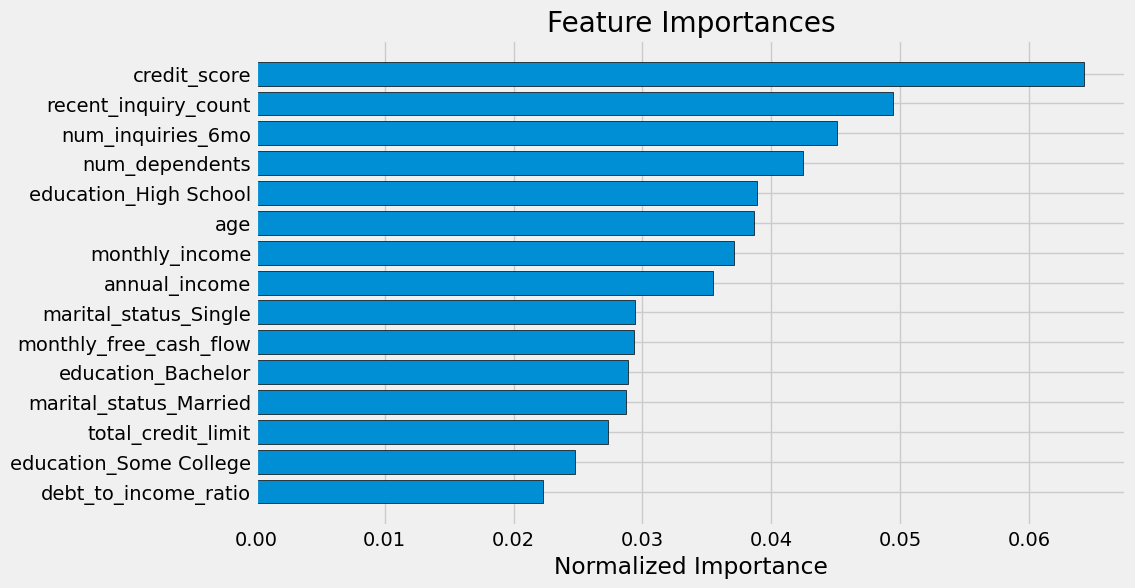

,index,feature,importance,importance_normalized
0,2,credit_score,0.064307,0.064307
1,9,recent_inquiry_count,0.049484,0.049484
2,8,num_inquiries_6mo,0.045101,0.045101
3,16,num_dependents,0.042470,0.042470
4,48,education_High School,0.038915,0.038915
...,...,...,...,...
80,60,state_MD,0.000707,0.000707
81,59,state_MA,0.000695,0.000695
82,68,state_TN,0.000686,0.000686
83,62,state_MO,0.000665,0.000665


In [37]:
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importance_values})
plot_feature_importances(feature_importances)

In [47]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.03,
    "num_leaves": 31,
    "max_depth": -1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 3,
    "scale_pos_weight":1
}

lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=600,
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)
proba = lgb_model.predict(X_test)
threshold = 0.25
pred = (proba > threshold).astype(int)

print("The accuracy:", accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("ROC-AUC:", roc_auc_score(y_test, proba))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 68324, number of negative: 68324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18612
[LightGBM] [Info] Number of data points in the train set: 136648, number of used features: 85
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[348]	valid_0's auc: 0.804326
The accuracy: 0.9342777777777778
[[16574   507]
 [  676   243]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17081
           1       0.32      0.26      0.29       919

    accuracy                           0.93  

In [45]:
print(os.listdir("./evaluation_set/"))

['application_metadata.csv', 'credit_history.parquet', 'demographics.csv', 'financial_ratios.jsonl', 'geographic_data.xml', 'loan_details.xlsx', 'results.csv']


In [142]:
application_metadata = pd.read_csv("./evaluation_set/application_metadata.csv")
credit_history_data = pd.read_parquet("./evaluation_set/credit_history.parquet", engine="pyarrow")
demographics_data = pd.read_csv("./evaluation_set/demographics.csv")
financial_ratios_data = pd.read_json("./evaluation_set/financial_ratios.jsonl", lines=True)
geographic_data = pd.read_xml("./evaluation_set/geographic_data.xml")
loan_details_data = pd.read_excel("./evaluation_set/loan_details.xlsx")

print("application_metadata's shape", application_metadata.shape)
print("credit_history's shape", credit_history_data.shape)
print("demographics's shape", demographics_data.shape)
print("financial_ratios_data's shape", financial_ratios_data.shape)
print("geographic_data's shape", geographic_data.shape)
print("loan_details_data's shape", loan_details_data.shape)

application_metadata's shape (10001, 13)
credit_history's shape (10001, 12)
demographics's shape (10001, 8)
financial_ratios_data's shape (10001, 16)
geographic_data's shape (10001, 8)
loan_details_data's shape (10001, 10)


In [143]:
demographics_data['annual_income'] = demographics_data['annual_income'].apply(clear_currency).astype(float)
financial_ratios_data['monthly_income'] = financial_ratios_data['monthly_income'].apply(clear_currency).astype(float)
financial_ratios_data['existing_monthly_debt'] = financial_ratios_data['existing_monthly_debt'].apply(clear_currency).astype(float)
financial_ratios_data['monthly_payment'] = financial_ratios_data['monthly_payment'].apply(clear_currency).astype(float)
financial_ratios_data['revolving_balance'] = financial_ratios_data['revolving_balance'].apply(clear_currency).astype(float)
financial_ratios_data['credit_usage_amount'] = financial_ratios_data['credit_usage_amount'].apply(clear_currency).astype(float)
financial_ratios_data['available_credit'] = financial_ratios_data['available_credit'].apply(clear_currency).astype(float)
financial_ratios_data['total_monthly_debt_payment'] = financial_ratios_data['total_monthly_debt_payment'].apply(clear_currency).astype(float)
financial_ratios_data['total_debt_amount'] = financial_ratios_data['total_debt_amount'].apply(clear_currency).astype(float)
financial_ratios_data['monthly_free_cash_flow'] = financial_ratios_data['monthly_free_cash_flow'].apply(clear_currency).astype(float)
loan_details_data['loan_amount'] = loan_details_data['loan_amount'].apply(clear_currency).astype(float)

In [144]:
application_metadata.rename(columns={"customer_ref": "customer_id"}, inplace=True)
credit_history_data.rename(columns={"customer_number": "customer_id"}, inplace=True)
demographics_data.rename(columns={"cust_id": "customer_id"}, inplace=True)
financial_ratios_data.rename(columns={"cust_num": "customer_id"}, inplace=True)
geographic_data.rename(columns={"id": "customer_id"}, inplace=True)

In [145]:
all_data = (
    application_metadata.merge(credit_history_data, on="customer_id")
    .merge(demographics_data, on="customer_id")
    .merge(financial_ratios_data, on="customer_id")
    .merge(geographic_data, on="customer_id")
    .merge(loan_details_data, on="customer_id")
)

In [146]:
all_data.drop(columns=['referral_code', 'has_mobile_app', 'paperless_billing', 'previous_zip_code', 'num_customer_service_calls', 'account_open_year','num_login_sessions', 'preferred_contact', 'account_status_code', 'origination_channel', 'marketing_campaign', 'application_id', 'application_hour', 'loan_officer_id', 'application_day_of_week'], inplace=True)

In [147]:
print(all_data['employment_type'].unique())
print(all_data['state'].unique())
print(all_data['loan_type'].unique())
print(all_data['loan_purpose'].unique())

['Self Employed' 'SELF_EMPLOYED' 'Part Time' 'FULL_TIME' 'FT' 'Contract'
 'Self-employed' 'PART_TIME' 'Fulltime' 'Full-time' 'PT' 'Full Time'
 'Self Emp' 'CONTRACT' 'Part-time' 'Contractor']
['TN' 'CA' 'NY' 'MA' 'IL' 'TX' 'FL' 'NJ' 'NC' 'OH' 'MI' 'VA' 'GA' 'WI'
 'AZ' 'MO' 'IN' 'PA' 'WA' 'MD']
['Personal' 'CC' 'credit card' 'MORTGAGE' 'Home Loan' 'Credit Card'
 'mortgage' 'PERSONAL' 'CreditCard' 'Mortgage' 'Personal Loan' 'personal']
['Debt Consolidation' 'Revolving Credit' 'Refinance' 'Home Purchase'
 'Other' 'Major Purchase' 'Home Improvement' 'Medical']


In [148]:
all_data['employment_type'].replace(['Full-time', 'FULL_TIME', 'Fulltime', 'Full Time', 'FT'], 'full_time', inplace=True)
all_data['employment_type'].replace(['Part Time', 'PART_TIME', 'PT', 'Part-time'], 'part_time', inplace=True)
all_data['employment_type'].replace(['Self Employed', 'Self Emp', 'Self-employed', 'SELF_EMPLOYED'], 'self_employed', inplace=True)
all_data['employment_type'].replace(['Contractor', 'Contract', 'CONTRACT'], 'contract', inplace=True)
all_data['loan_type'].replace(['Personal', 'Personal Loan', 'PERSONAL', 'personal'], 'personal', inplace=True)
all_data['loan_type'].replace(['mortgage', 'Mortgage', 'MORTGAGE'], 'mortgage', inplace=True)
all_data['loan_type'].replace(['CreditCard', 'Credit Card', 'CC', 'credit card'], 'credit_card', inplace=True)
all_data['loan_type'].replace(['Home Loan'], 'home_loan', inplace=True)

In [149]:
all_data = pd.get_dummies(all_data)
imputer = SimpleImputer(strategy='median')
customer_id = all_data["customer_id"]
all_data = pd.DataFrame(imputer.fit_transform(all_data), columns=all_data.columns)
num_cols = all_data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
all_data[num_cols] = scaler.fit_transform(all_data[num_cols])

In [150]:
proba = random_forest.predict_proba(all_data)[:,1]

threshold = 0.25
pred = (proba > threshold).astype(int)

results = pd.DataFrame({
    "customer_id": customer_id,
    "prob": proba,
    "default": pred
})


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


In [151]:
results['default'].value_counts()

default
1    9525
0     476
Name: count, dtype: int64

In [152]:
results.to_csv("results.csv",  index=False)